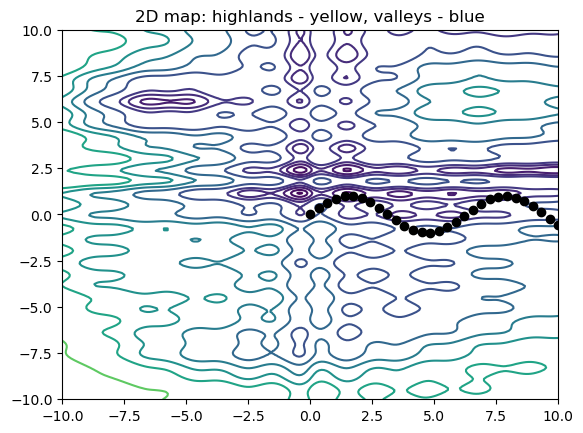

In [2]:
import random

"""
 2-D function drawing with points

"""
import numpy as np
#import math
import matplotlib.pyplot as plt

def fun3(x1,x2):
    eps = 0.00000001
    R1 = np.sqrt(0.3*(x1+3)**2 + (x2+4)**2 + eps)
    R2 = np.sqrt(0.2*(x1-7)**2 + (x2-6)**2 + eps)
    R3 = np.sqrt(0.2*(x1-7)**2 + 0.5*(x2-6)**2 + eps)
    R4 = np.sqrt(0.7*(x1+7)**2 + 2*(x2-6)**2 + eps)
    R5 = np.sqrt(0.2*(x1+3)**2 + 0.05*(x2+5)**4 + eps)

    y = np.sin(x1*3)/(abs(x1)+1) + np.sin(x2*5-1)/(abs(x2/2-1)+1) + ((x1-5)**2+(x2-5)**2)/50 + \
        4*np.sin(R1)/R1 + 4*np.sin(R2)/R2 - 3*np.sin(R4)/R4 - 3*np.sin(R5)/R5
    return y

def draw_map():
    X1, X2 = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
    Z = fun3(X1,X2)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    cs = plt.contour(X1,X2,Z, levels=[-2.0, -1.8, -1.5, -1, -0.5, 0, 1, 2, 3, 4, 5,7,10])
    #fig,ax = plt.subplots()
    #CS = ax.contour(X1,X2,Z, levels=[-2.0, -1.8, -1.5, -1, -0.5, 0, 1, 2, 3, 4, 5,7,10])
    #ax.clabel(CS, inline=True, fontsize=10)

def show_fun():

    draw_map()
    x = np.linspace(0, 10, 30)
    y = np.sin(x)
    plt.plot(x, y, 'o', color='black');
    plt.title('2D map: highlands - yellow, valleys - blue')
    plt.show()

def show_point_sequence(Points,title):
    draw_map()
    plt.plot(Points[:,0], Points[:,1], '', color='blue');
    plt.plot(Points[:,0], Points[:,1], 'o', color='blue',markersize=12,linewidth=2);
    plt.plot(Points[-1,0], Points[-1, 1], '+', color='red', markersize=20, linewidth=3);
    plt.title(title)
    plt.show()

def show_the_point(x,title):
    draw_map()
    plt.plot(x[0], x[1], '+', color='red', markersize=12, linewidth=2);
    plt.title(title)
    plt.show()


show_fun()


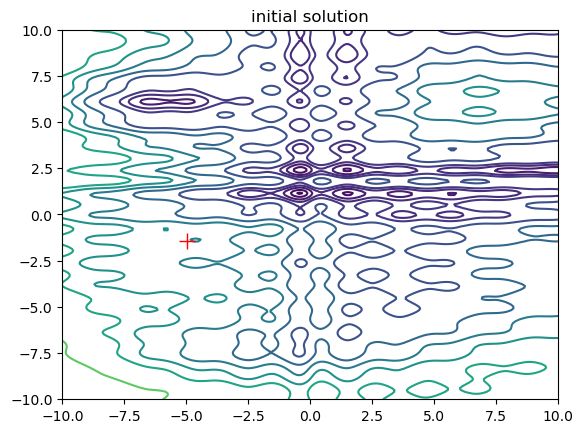

In [3]:
num_of_steps = 2000                                 # number of steps: do not change

num_of_parameters = 2                               # number of solution parameters
N = num_of_parameters
Solution = np.random.rand(N)*20-10                  # initial solution - random point

E_min = 10e40							            # minimal function value
E_prev = 0                                          # previous value of the function
Records = np.empty((0,N))                           # array of record solutions

show_the_point(Solution,"initial solution")


best solution, value = -1.8334947108196773 for point x1 = -0.4471213947817336 x2 = 1.1614493535252117



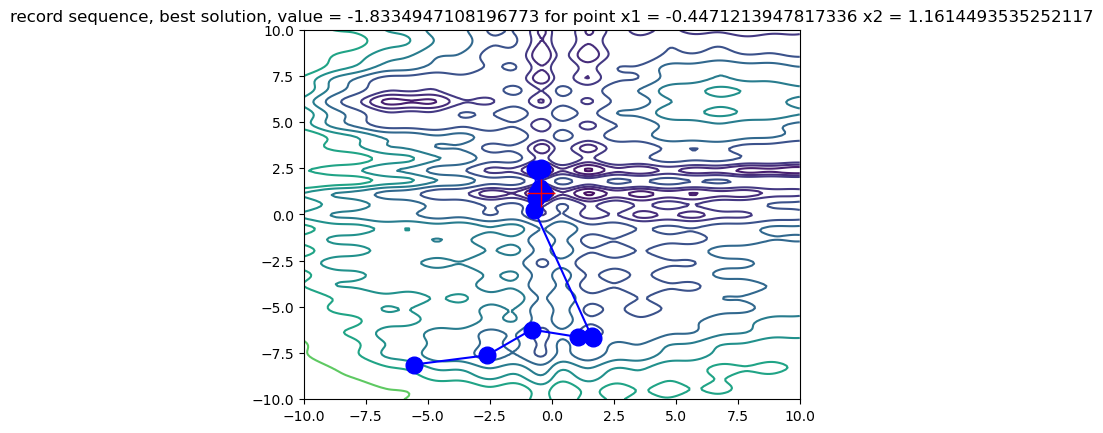

best solution, value = -1.8201414182771556 for point x1 = -0.4440345325790829 x2 = 1.1058521146430083



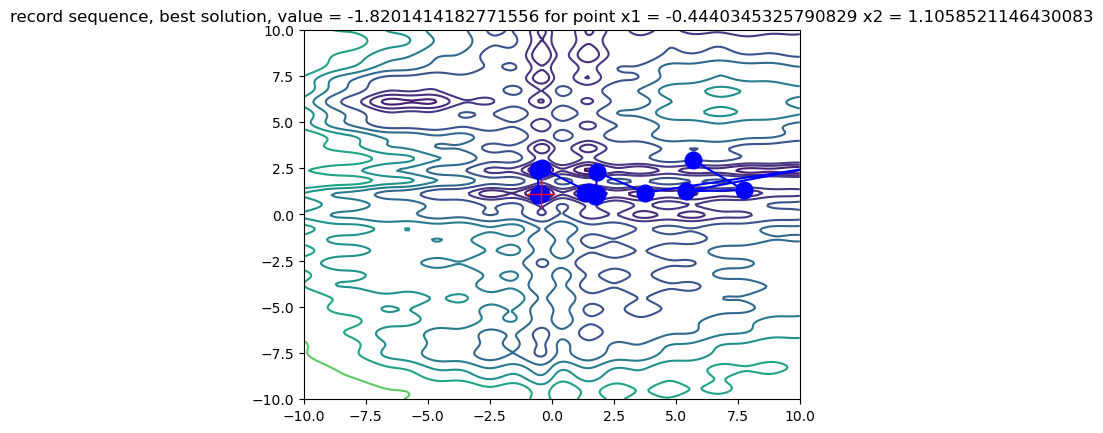

best solution, value = -1.8305693833864127 for point x1 = -0.4440228179226047 x2 = 1.1700043483101665



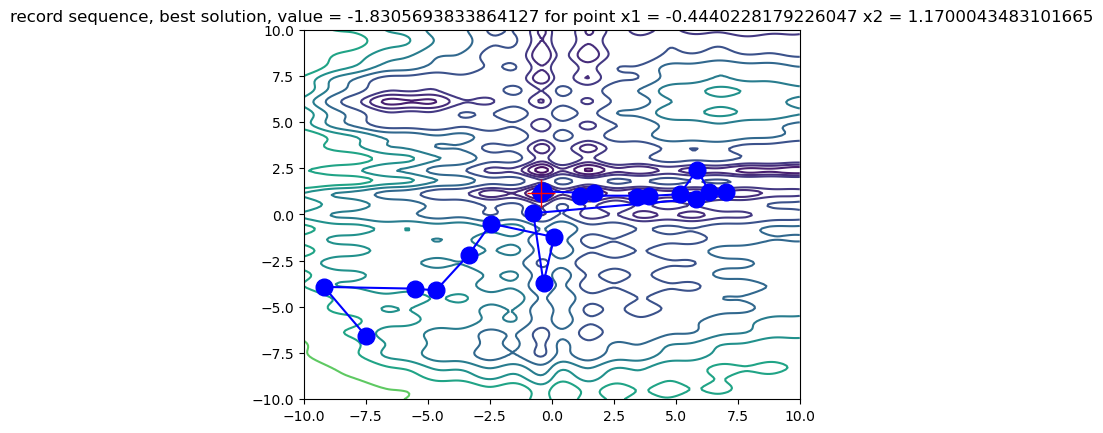

best solution, value = -1.8308367794170761 for point x1 = -0.38291741040268423 x2 = 1.1513625299838333



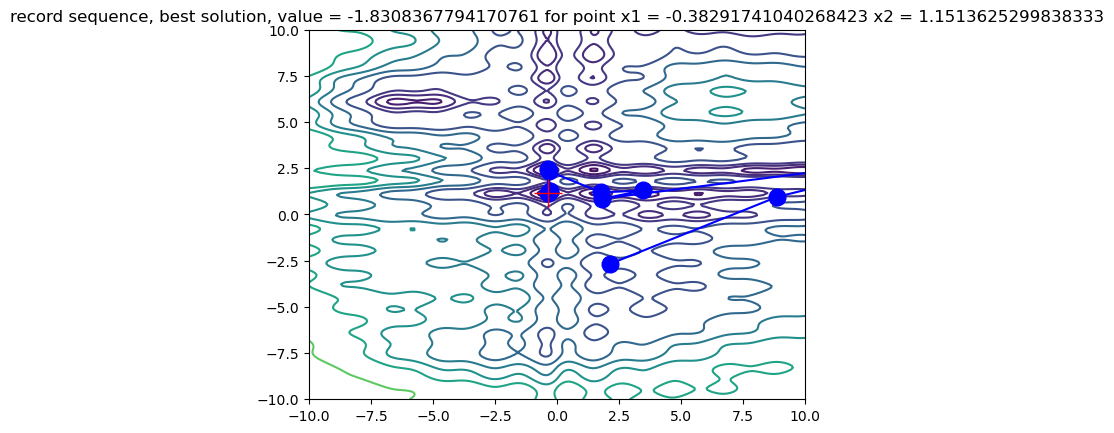

best solution, value = -1.0639241331357276 for point x1 = 3.943294613056399 x2 = 1.1788139075418442



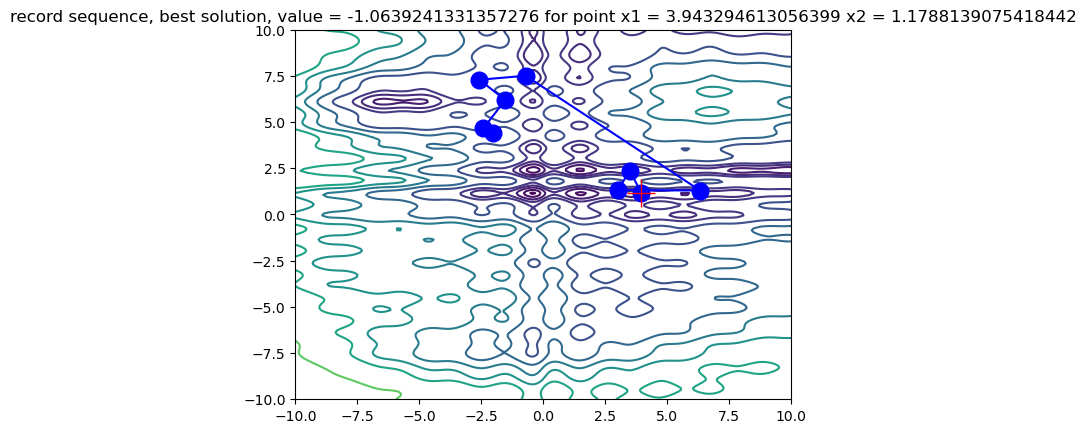

In [25]:
T = 15.0           # temperature (randomness coefficient)
T_init = T
T_min = 0.01                                # minimal temperature
wT = 0.9959                          # change of temperature
c = 1.97  # constant due to the influence of T for acceptance probability
for i in range(5):
    num_of_steps = 2000     # number of steps: do not change
    num_of_parameters = 2   # number of solution parameters
    N = num_of_parameters
    Solution = np.random.rand(N)*20-10   # initial solution - random point
    E_min = 10e40							            # minimal function value
    E_prev = 0                                          # previous value of the function
    Records = np.empty((0,N)) # array of record solutions
    T = T_init
    for ep in range(num_of_steps):
        SolutionNew = Solution + np.random.uniform(-c, c, 2)  # new solution (should be near previous one !)

        E = fun3(SolutionNew[0],SolutionNew[1])       # function value for point coordinates

        dE = E - E_prev                                  # change of function value (dE < 0 means than new solution is better)

        p_accept = 1 / (1 + np.exp(dE / (c * T)) )

        # Determine if solution is accepted
        accepted = np.random.rand() < p_accept


        if accepted:
            Solution = SolutionNew
            E_prev = E

        if E_min > E:
          #print("new minimum = " + str(E) + " for point x1 = " + str(SolutionNew[0]) + " x2 = " + str(SolutionNew[1]) + "\n")
          E_min = E
          Solution_min = SolutionNew
          Records = np.append(Records, [SolutionNew], axis = 0)

        T = T*wT
    # end of steps loop
    text = "best solution, value = " + str(E_min) + " for point x1 = " + str(Solution_min[0]) + " x2 = " + str(Solution_min[1])
    print(text + "\n")
    show_point_sequence(Records,"record sequence, " + text)